In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22184


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22179,2021-04-27,47,沖縄県,86,12265,1,134
22180,2021-04-28,47,沖縄県,63,12328,0,134
22181,2021-04-29,47,沖縄県,76,12404,0,134
22182,2021-04-30,47,沖縄県,59,12463,2,136
22183,2021-05-01,47,沖縄県,105,12568,1,137


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["都道府県コード"]
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp.tail()

,都道府県名,各地の感染者数合計,各地の死者数_1日ごとの発表数
42,静岡県,6496,121
43,香川県,1281,22
44,高知県,1052,20
45,鳥取県,374,2
46,鹿児島県,2183,28


In [4]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


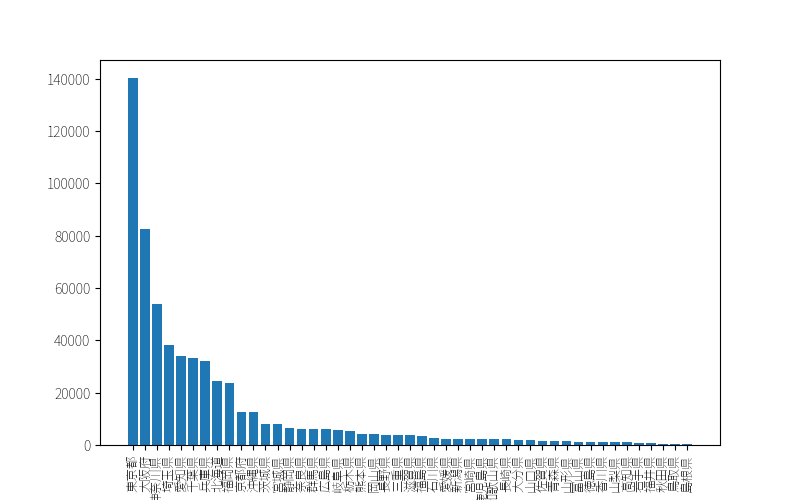

<BarContainer object of 47 artists>

In [6]:
fig = plt.figure(figsize=(8,5))
plt.xticks(rotation="90",fontsize=9)

plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])


In [7]:
#plt.bar(tokyo["日付"],tokyo["各地の感染者数_1日ごとの発表数"],width=1.0)